In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('/Users/praneethbandi/TF_2_Notebooks_and_Data/DATA/lending_club_loan_two.csv')

In [171]:
#Will have to deal with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

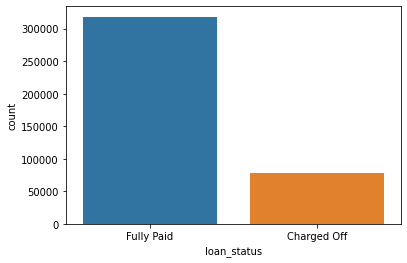

In [172]:
sns.countplot(x='loan_status', data=df);

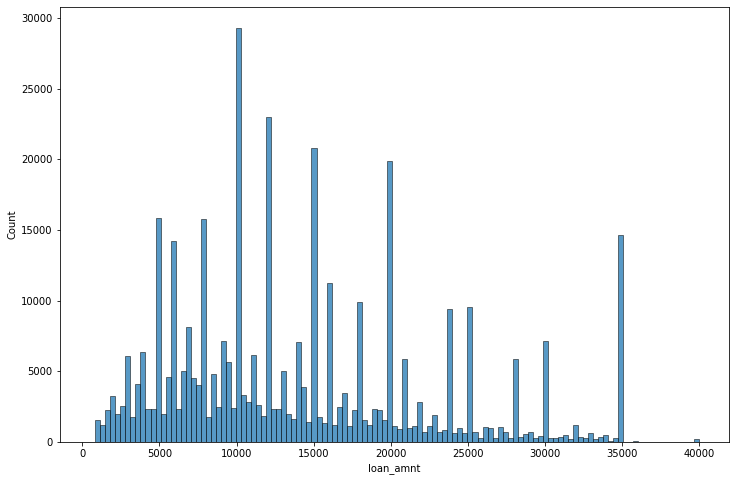

In [173]:
plt.figure(figsize=(12,8))
sns.histplot(x='loan_amnt', data=df);

In [174]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


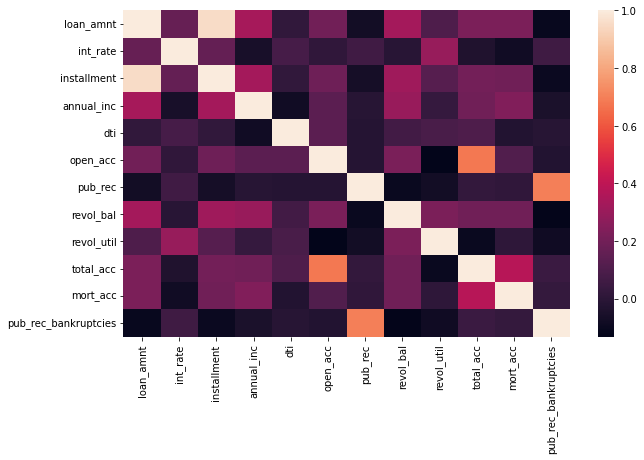

In [175]:
#Turning this into a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr());
#High Correlation between loan_amnt and installment, pub_rec and pub_rec_backruptcies, and open_acc and total_acc

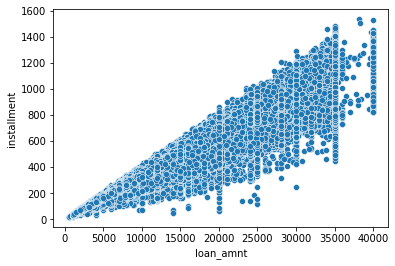

In [176]:
sns.scatterplot(x='loan_amnt', y='installment', data=df);

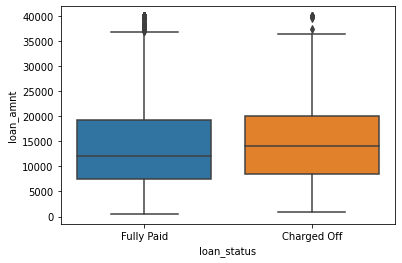

In [177]:
sns.boxplot(x='loan_status',y='loan_amnt', data=df);
#loan_amnt has a small effect on loan_status

In [178]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [179]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

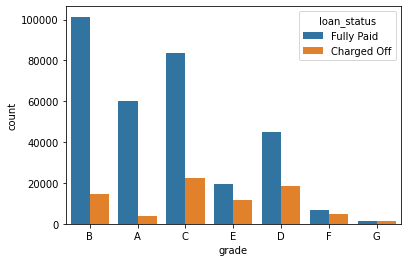

In [180]:
sns.countplot(x='grade', data=df, hue='loan_status');
#Need to reorder the grade to alphabetical

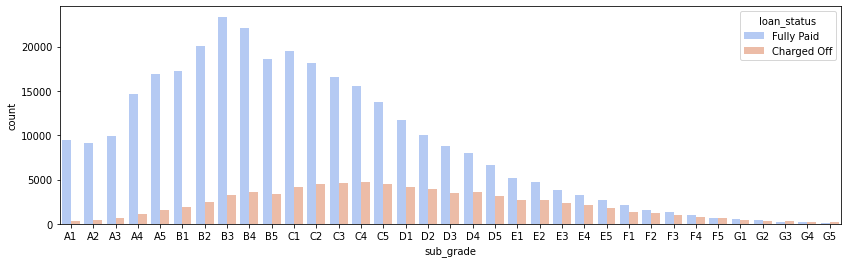

In [181]:
plt.figure(figsize=(14,4))
subgrade_order = sorted(df['sub_grade'].unique()) #sort the subgrade labels
sns.countplot(x='sub_grade', data=df, order = subgrade_order, palette='coolwarm', hue='loan_status');
#Most people are in the A - C grades. 
#F and G grades have a near equal number of Fully Paid and Charged Off

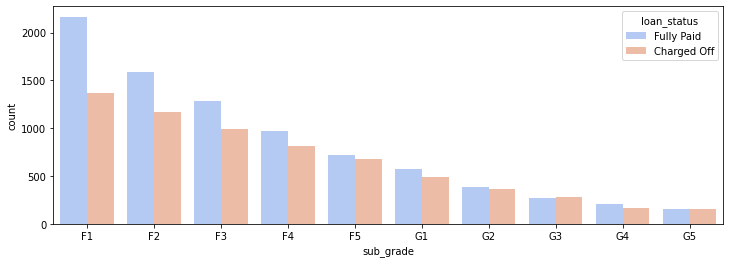

In [182]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

#Zooming in on F and G
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order = subgrade_order, palette='coolwarm', hue='loan_status');

In [183]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


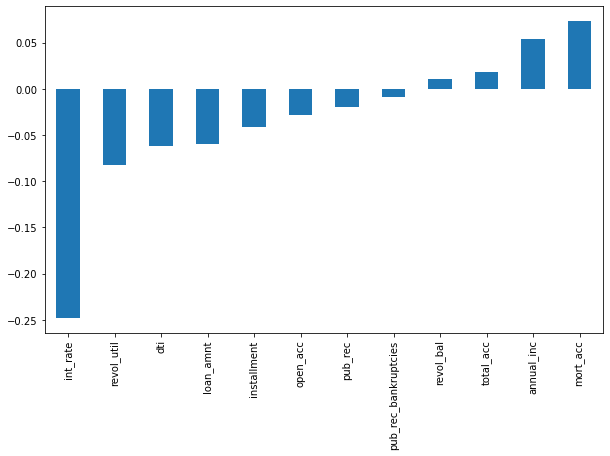

In [184]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar');

In [185]:
#Dealing with missing data
(df.isnull().sum() / len(df)) * 100
#Percentage of missing data of total data

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [186]:
df['emp_title'].value_counts()
#Too many unique job titles so it will be removed

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [187]:
df = df.drop('emp_title', axis=1)

In [188]:
#Drop null values when calling functions like unique()
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [189]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

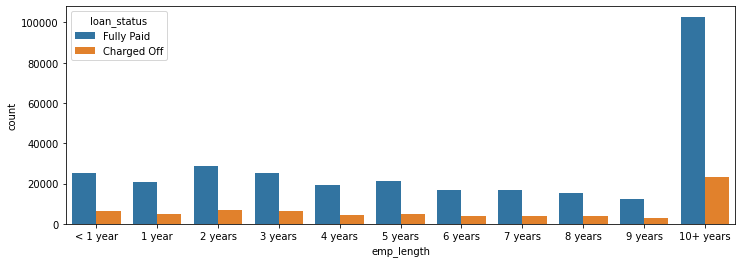

In [190]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status');

In [191]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [192]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [193]:
emp_co/(emp_co+emp_fp) * 100
#The percentage of charged off is nearly the same so this feature can be dropped

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

In [194]:
df = df.drop('emp_length', axis=1)

In [195]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [196]:
df['purpose'].nunique()

14

In [197]:
df['title']
#Not important so can be dropped

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [198]:
df = df.drop('title', axis=1)

In [199]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [200]:
df.corr()['mort_acc'].sort_values()
#Total_acc correlates to mort_acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [201]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc'] 
#Take the average mort_acc based on total_acc and fill in the missing values of mort_acc

In [202]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [203]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [204]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [205]:
df = df.dropna()

In [206]:
#Dealing with string features
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [207]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [208]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [209]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [210]:
#Grade is part of subgrade, so it can be dropped
df = df.drop('grade', axis=1)

In [211]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [212]:
#Change other feature into dummy ones
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [162]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [213]:
df['home_ownership'].value_counts()
#Create 4 columns with Other, Mortgage, Rent, and Own

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [214]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [215]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [218]:
#Getting the zipcode
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [220]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [221]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [222]:
df = df.drop('address', axis=1)

In [224]:
df = df.drop('issue_d', axis=1)

In [226]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [227]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [228]:
#Preprocessing
from sklearn.model_selection import train_test_split

In [229]:
df = df.drop('loan_status', axis=1) #loan_status is replaced by loan_repaid

In [230]:
X = df.drop('loan_repaid', axis=1).values

In [231]:
y = df['loan_repaid'].values

In [232]:
df = df.sample(frac=0.15, random_state=101)

In [233]:
len(df)

59283

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [235]:
from sklearn.preprocessing import MinMaxScaler

In [236]:
scaler = MinMaxScaler()

In [237]:
X_train = scaler.fit_transform(X_train)

In [238]:
X_test = scaler.transform(X_test)

In [243]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [244]:
X_train.shape

(316175, 78)

In [245]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [246]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256, validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.3019 - val_loss: 0.2673
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2658 - val_loss: 0.2643
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2634 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2618 - val_loss: 0.2632
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2610 - val_loss: 0.2625
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2605 - val_loss: 0.2621
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2629
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2596 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2593 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.258

In [248]:
from tensorflow.keras.models import load_model

In [249]:
model.save('LendingPrediction.h5')

In [251]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

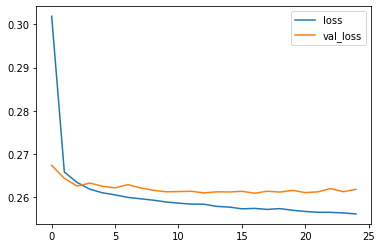

In [253]:
losses.plot();

In [254]:
from sklearn.metrics import classification_report, confusion_matrix

In [256]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 2ms/step


In [258]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [259]:
confusion_matrix(y_test, predictions)

array([[ 7089,  8569],
       [  295, 63091]])

In [260]:
#Testing the model
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              36.00
int_rate           7.90
installment      782.26
annual_inc     62000.00
                 ...   
30723              0.00
48052              0.00
70466              1.00
86630              0.00
93700              0.00
Name: 385487, Length: 78, dtype: float64

In [261]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [263]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 25ms/step


array([[1]], dtype=int32)

In [264]:
df.iloc[random_ind]['loan_repaid'] #Predicted right

1.0